# HW1  Try out gradient descent


You should submit this jupyter notebook with your solutions. The solutions should include the code and also the output of all the cells.

Note that for the problmes that require a cost function as input you should always use the most recent cost function that you have implemented (unless specified otherwise).

**1) [5 points]** Calculate the derivative of following cost function and write it down:

$g(w) = \frac{1}{50}\left(w^6+ 3w^4 - 15w^3 + w^2 + 10w - 50 \right)$

<font color='red'>**answer:** $\frac{\partial}{\partial w}g(w) = \frac{1}{50}(6w^5 + 12w^3 - 45w^2 + 2w + 10)$ </font>

**2) [25 points]** Implement the gradient descent function as discussed in class using the gradient derived in the last problem. The function should return the cost history for each step. Use the code template below:


In [ ]:
#gradient descent function
#inputs: alpha (learning rate parameter), max_its (maximum number of iterations), w0 (initialization)
def gradient_descent(alpha,max_its,w0):
    #Initialize variables:
    wk = w0  #Setting our first value of w to the initial input value, w0

    #Initialize storage array:
    cost_history = [((1/50)*(wk**6 + 3*wk**4 - 15*wk**3 + wk**2 + 10*wk - 50))]  #This array will store the cost value from each iteration; initialize with cost of w0

    #Based on gradient descent pseudocode from Lecture 3, we loop through the cost values at each step k:
    for k in range(max_its):
        ##Gradient descent algorithm is given by: w^k = w^(k-1) + -α∇g(w^(k-1))
        deriv_val = (1/50)*(6*wk**5 + 12*wk**3 - 45*wk**2 + 2*wk + 10)  #Gradient equation from previous problem
        wk = wk - alpha*deriv_val  #Update wk based on previous val of wk (i.e. w^k-1)

        cost_val = ((1/50)*(wk**6 + 3*wk**4 - 15*wk**3 + wk**2 + 10*wk - 50))  #Calculate new cost using cost function g(w)

        cost_history.append(cost_val)

    return cost_history

**3) [10 points]** Run the gradient_descent function you implemented three times, with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). If you are not familiar with plotting in python, here is the docs for matplotlib:(https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).


$w^0$ = 2.0
max_its = 2000

# first run
alpha = 0.01
# second run
alpha = 0.001
# third run
alpha = 0.0001


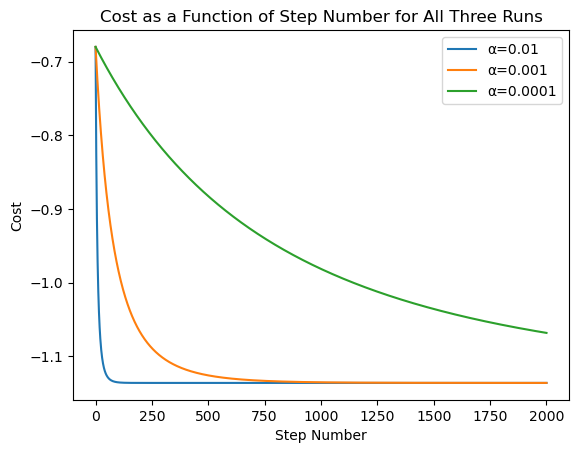

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#Initialize constant variables:
w0 = 2.0
max_its = 2000

#First run:
alpha = 0.01
cost_history_1 = gradient_descent(alpha,max_its,w0)

#Second run:
alpha = 0.001
cost_history_2 = gradient_descent(alpha,max_its,w0)

#Third run:
alpha = 0.0001
cost_history_3 = gradient_descent(alpha,max_its,w0)

#Create and format plot:
plt.plot(cost_history_1, label='α=0.01')
plt.plot(cost_history_2, label='α=0.001')
plt.plot(cost_history_3, label='α=0.0001')

plt.title('Cost as a Function of Step Number for All Three Runs')
plt.xlabel('Step Number')  #Step number = # of iterations
plt.ylabel('Cost')
plt.legend(loc='upper right')
plt.show()

**For the next few problems we will be comparing fixed and diminishing learning rates**

Take the following cost function:
\begin{equation}
g(w) = \left \vert w \right \vert
\end{equation}

**4) [5 points]** Is this function convex? If no, why not? If yes, where is its global minimum?
<font color='red'><br> **answer:** Yes, this function **is a convex function.**<br>
<br>According to the Lecture 3: Gradient Descent slides, a convex function is "a function that for any two points on its graph, the line segment connecting the two points lies above or on the graph of the function." Looking at the graph of |w| below, we see there are no  "dips" or "valleys", which is indicative of no two points laying below the function. **Its global minimum, i.e. the smallest overall value over its entire range, resides at x=0,** which is the only point on the graph that is non-differentiable. </font>

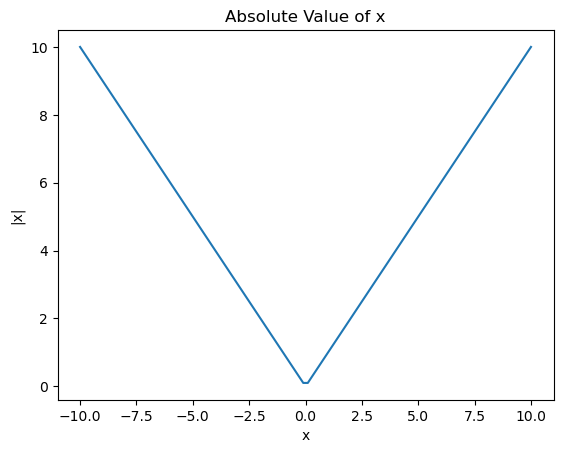

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Generate values for x
x = np.linspace(-10, 10, 100)  #Define x-axis with 100 points between -10 and 10

y = np.abs(x)

#Plot the absolute value function
plt.plot(x,y)
plt.title('Absolute Value of x')
plt.xlabel('x')
plt.ylabel('|x|')
plt.show()

**5) [5 points]** What is the derivative of the cost function?
<br><font color='red'>**answer:** $\frac{\partial}{\partial w}g(w) = \frac{x}{|x|}$, if w ≠ 0</font>

<font color='red'>this is because |x| is equivalent to $√(x^2) = (x^2)^\frac{1}{2}$, upon which taking the chain rule gives $\frac{x}{(x^2)^\frac{1}{2}} = \frac{x}{|x|}$ </font>

**6) [20 points]** Rewrite the gradient descent function from question 2 such that it takes the cost funciton g as input and uses the autograd library to calculate the gradient. The function should return the weight and cost history for each step. Use the code template below.

autograd is a python package for automatic calculation of the gradient. Here is a tutorial on it: (http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/tutorials/tut4.pdf

Note that in Python you can pass functions around like any other variables. That is why you can pass the cost function g to the gradient_descent function.

You should be able to install it by running "pip install autograd" in a cell in your Jupyter notebook.

In [ ]:
from autograd import grad

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function
    wk = w0  #Setting our first value of w to the initial input value, w0

    #Initialize storage arrays:
    cost_history = [g(wk)]  #This array will store the cost value from each iteration; initialize with cost of w0
    weight_history = [wk]  #values of w are parameters, also called weights, so weight_history will store each iteration of wk

    for k in range(max_its):
        ##Gradient descent algorithm is given by: w^k = w^(k-1) + -α∇g(w^(k-1))
        deriv_val = gradient(wk)  #Now instead of manually typing gradient equation, we use grad(g) function
        wk = wk - alpha*deriv_val  #Update wk based on previous val of wk (i.e. w^k-1)

        cost_val = g(wk)  #Calculate new cost using cost function g(w)

        cost_history.append(cost_val)
        weight_history.append(wk)


    return weight_history,cost_history

**7) [10 points]** Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, and a fixed learning rate of $\alpha = 0.5$. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis). Recall that the terms weight and parameter used interchangeably and both refer to w.

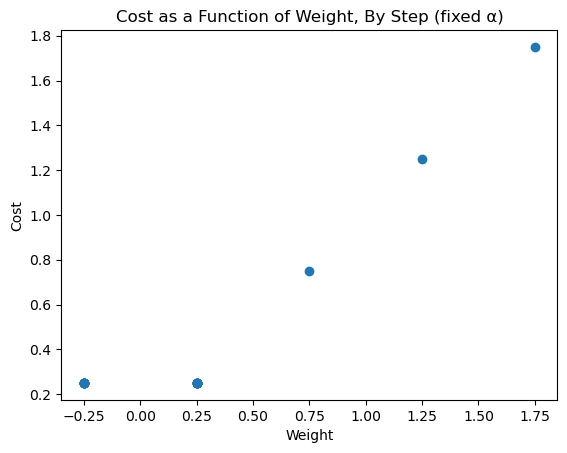

In [ ]:
#Initialize variables:
max_its = 20
w0 = 1.75
alpha = 0.5

#Define the cost function g(w)
def g(w):
    return abs(w)

#Obtain weight and cost values using our gradient_descent function
fixed_val = gradient_descent(g,alpha,max_its,w0)

#Create plot of results:
plt.scatter(fixed_val[0], fixed_val[1])  #Using a scatter plot to make the true nature of the data more visible

plt.title('Cost as a Function of Weight, By Step (fixed α)')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

**8) [15 points]** Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, using the diminishing rule $\alpha = \frac{1}{k}$ (for this you have to modify the gradient_descent function slightly. Use the code template below. Using the cost and wieght history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis)

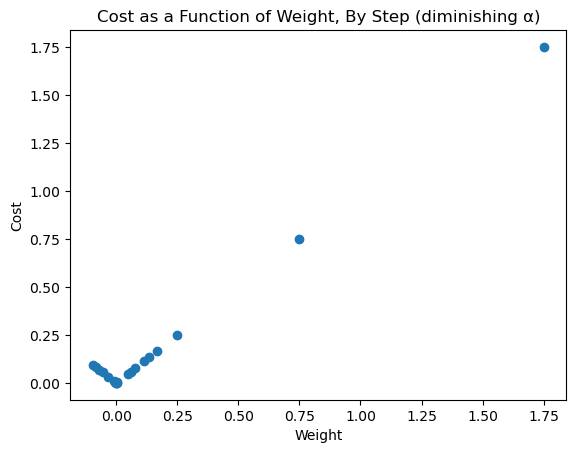

In [ ]:
from autograd import grad

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function
    wk = w0  #Setting our first value of w to the initial input value, w0

    #Initialize storage arrays:
    cost_history = [g(wk)]  #This array will store the cost value from each iteration; initialize with cost of w0
    weight_history = [wk]  #values of w are parameters, also called weights, so weight_history will store each iteration of wk

    for k in range(1, max_its+1):  #Modify the loop range in order to avoid division by 0 for alpha
        #Now if alpha is indicated as diminishing, we modify; otherwise continue as normal
        if alpha=='diminishing':
            alpha_k = 1/k  #We need to use a new alpha_k variable so we dont redefine the alpha 'string'
        else:
            alpha_k = alpha

        ##Gradient descent algorithm is given by: w^k = w^(k-1) + -α∇g(w^(k-1))
        deriv_val = gradient(wk)
        wk = wk - alpha_k*deriv_val  #Update wk based on previous val of wk (i.e. w^k-1)

        cost_val = g(wk)  #Calculate new cost using cost function g(w)

        cost_history.append(cost_val)
        weight_history.append(wk)


    return weight_history,cost_history


#Now testing with the given parameters:
max_its = 20
w0 = 1.75
alpha = 'diminishing'

#Define the cost function g(w)
def g(w):
    return abs(w)

#Obtain weight and cost values using our gradient_descent function
diminishing_val = gradient_descent(g,alpha,max_its,w0)

#Create plot of results:
plt.scatter(diminishing_val[0], diminishing_val[1])  #Using a scatter plot to make the true nature of the data more visible

plt.title('Cost as a Function of Weight, By Step (diminishing α)')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

#IMPORTANT NOTE: the graph behavior looks peculiar in the beginning likely due to the fact that |x| is non-differentiable at 0

**9) [10 points]**  Generate a single plot showing the cost as a function of step number for both runs (combine all  runs into a single plot). Which approach would be better? Write your justification


<font color='red'>**answer:** After reviewing the graph of both runs shown below, **I believe using a diminishing learning rate approach works better than using a fixed learning rate for this problem.** This is a tough call--the fixed rate moves more consistently and flattens out at a reliable final minimum; however it is slower (i.e. takes more steps) and does not reach the true minimum of the function (which is zero), instead stopping at a cost of ~0.25. Conversely, the diminishing rate converges more quickly and reaches a lower cost closer to the true minimum, but exhibits oscillatory behavior.<br><br></font>

<font color='red'>All things considered, the diminishing learning rate approach is better in this particular case due to its faster initial convergence and ability to achieve a lower cost closer to the true minimum of |w|. The oscillations, while present, can be managed (they are small/more controlled), and typically with optimization problems approaching the minimum cost is the highest priority.</font>

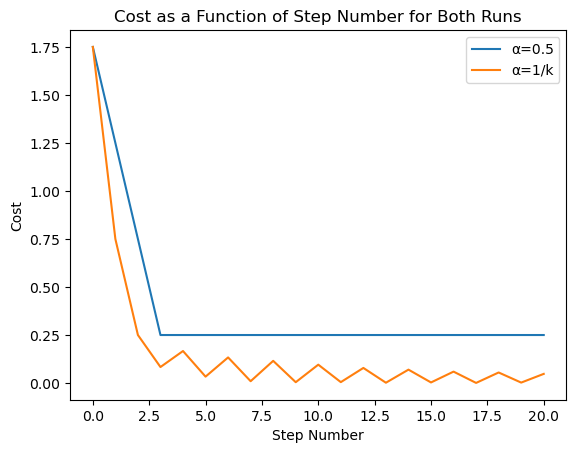

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#Initialize constant variables:
max_its = 20
w0 = 1.75

#Define the cost function g(w)
def g(w):
    return abs(w)

#Obtain fixed cost values using our gradient_descent function
alpha = 0.5
fixed_val = gradient_descent(g,alpha,max_its,w0)

#Obtain diminishing cost values using our gradient_descent function
alpha = 'diminishing'
diminishing_val = gradient_descent(g,alpha,max_its,w0)

#Create and format plot:
plt.plot(fixed_val[1], label='α=0.5')
plt.plot(diminishing_val[1], label='α=1/k')

plt.title('Cost as a Function of Step Number for Both Runs')
plt.xlabel('Step Number')  #Step number = # of iterations
plt.ylabel('Cost')
plt.legend(loc='upper right')
plt.show()

**We will now look at the oscilating behavior of gradient descent.**

Take the following cost function:
$g(w) = w_0^2 + w_1^2 + 2\sin(1.5 (w_0 + w_1)) +2$

Note that this cost function has two parameters.

**10) [5 points]** Make sure your gradient descent function from problem 6 can handle cost functions with more than one parameter. You may need to rewrite it if you were not careful. Use the code template below (if your function from problem 6 is good, you can just copy and paste it here)

In [ ]:
from autograd import grad

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function
    wk = w0  #Setting our first value of w to the initial input value, w0

    #Initialize storage arrays:
    cost_history = [g(wk)]  #This array will store the cost value from each iteration; initialize with cost of w0
    weight_history = [wk]  #values of w are parameters, also called weights, so weight_history will store each iteration of wk

    for k in range(max_its):
        ##Gradient descent algorithm is given by: w^k = w^(k-1) + -α∇g(w^(k-1))
        deriv_val = gradient(wk)  #Now instead of manually typing gradient equation, we use grad(g) function
        wk = wk - alpha*deriv_val  #Update wk based on previous val of wk (i.e. w^k-1)

        cost_val = g(wk)  #Calculate new cost using cost function g(w)

        cost_history.append(cost_val)
        weight_history.append(wk)


    return weight_history,cost_history

**11) [10 points]** Run the gradient_descent function with the cost function above three times with the following parameters. Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). Use the code template below. Which alpha leads to an oscillating behavior?

$w^0$ = [3.0,3.0]
max_its = 10

# first run
alpha = 0.01
# second run
alpha = 0.1
# third run
alpha = 1



<font color='red'>**answer:** As seen from the graph below, the graph begins to oscillate wildly when **alpha (α) = 1**</font>

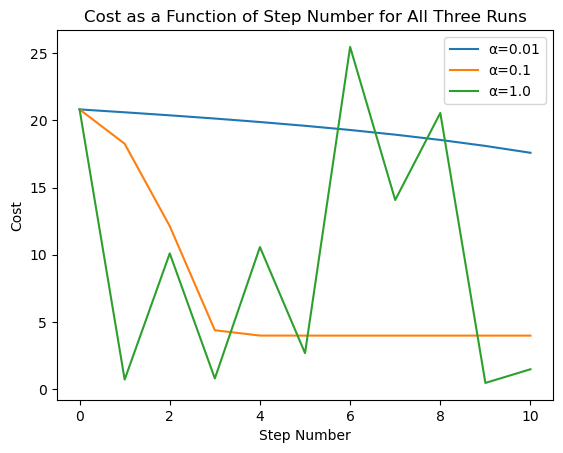

In [ ]:
import autograd.numpy as np

#Define the cost function g(w):
def g(w):
    return w[0]**2 + w[1]**2 + 2*np.sin(1.5*(w[0]+w[1])) + 2

#Initialize constant variables:
max_its = 10
w0 = np.array([3.0,3.0])

#First run:
alpha = 0.01
cost_history_1 = gradient_descent(g,alpha,max_its,w0)[1]  #We only want cost history, not weight history, so use [1]

#Second run:
alpha = 0.1
cost_history_2 = gradient_descent(g,alpha,max_its,w0)[1]

#Third run:
alpha = 1.0
cost_history_3 = gradient_descent(g,alpha,max_its,w0)[1]

#Create and format plot:
plt.plot(cost_history_1, label='α=0.01')
plt.plot(cost_history_2, label='α=0.1')
plt.plot(cost_history_3, label='α=1.0')

plt.title('Cost as a Function of Step Number for All Three Runs')
plt.xlabel('Step Number')  #Step number = # of iterations
plt.ylabel('Cost')
plt.legend(loc='upper right')
plt.show()

**12) [15 points]** This problem is about learning to tune fixed step length for gradient descent. Here, you are given a cost function:
$g(w) = 2w_0^2 + w_1^2 +4w_2^2$

Assume your $w^0$= [5,5,5] and your max_iter = 100

Use your latest gradient descent function with a fixed learning rate. Play around with at least 5 different values of alpha (***using your intuition; Hint: you should try with alpha values smaller than 0.1***). Generate a single plot of the cost as a function of the number of iterations. Which value of alpha seems to converge the fastest?

Not that your grade will not depend on how well you do, as long as you try at least 5 different values for alpha and plot them.

<font color='red'>**answer:** Based on the graph below, the gradient descent seems to converge the fastest when alpha (α) = 0.05 (ignoring the reference when α=0.1). The function behavior in this particular case shows that as alpha gets smaller, convergence slows. </font>

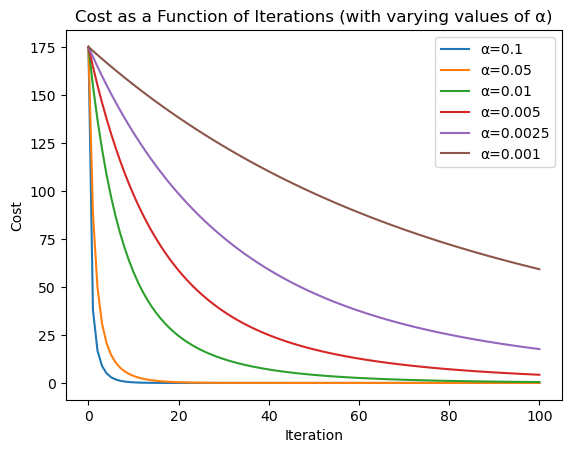

In [ ]:
import autograd.numpy as np

#Define the cost function g(w):
def g(w):
    return 2*w[0]**2 + w[1]**2 + 4*w[2]**2

#Initialize constant variables:
max_its = 100
w0 = np.array([5.0,5.0,5.0])

#First run:
alpha = 0.1  #For reference
cost_history_1 = gradient_descent(g,alpha,max_its,w0)[1]

#Second run:
alpha = 0.05
cost_history_2 = gradient_descent(g,alpha,max_its,w0)[1]  #We only want cost history, not weight history, so use [1]

#Third run:
alpha = 0.01
cost_history_3 = gradient_descent(g,alpha,max_its,w0)[1]

#Fourth run:
alpha = 0.005
cost_history_4 = gradient_descent(g,alpha,max_its,w0)[1]

#Fifth run:
alpha = 0.0025
cost_history_5 = gradient_descent(g,alpha,max_its,w0)[1]

#Sixth run:
alpha = 0.001
cost_history_6 = gradient_descent(g,alpha,max_its,w0)[1]

#Create and format plot:
plt.plot(cost_history_1, label='α=0.1')
plt.plot(cost_history_2, label='α=0.05')
plt.plot(cost_history_3, label='α=0.01')
plt.plot(cost_history_4, label='α=0.005')
plt.plot(cost_history_5, label='α=0.0025')
plt.plot(cost_history_6, label='α=0.001')

plt.title('Cost as a Function of Iterations (with varying values of α)')
plt.xlabel('Iteration')  #Step number = # of iterations
plt.ylabel('Cost')
plt.legend(loc='upper right');  #Semicolon at the end of this line so no Out[]: